In [12]:
# Solar Power Model - Unseen Data Testing
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Load cleaned dataset
df = pd.read_csv("../Data Sets/Cleaned_Solar_Data.csv")

# Load saved model
model = joblib.load("../Models/solar_rf_model.pkl")

In [14]:
# Features used during training
feature_cols = ['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION', 'HOUR', 'MONTH']

# Prepare X and y
X = df[feature_cols]
y = df["DC_POWER"]

# Create train-test split (unseen test simulation)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---- PREDICTION STEP ----
y_pred = model.predict(X_test)

In [15]:
# ---- EVALUATION ----
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🔍 Evaluation on Unseen Test Data:")
print(f"R² Score: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


🔍 Evaluation on Unseen Test Data:
R² Score: 0.9892
MAE: 177.42
RMSE: 404.33


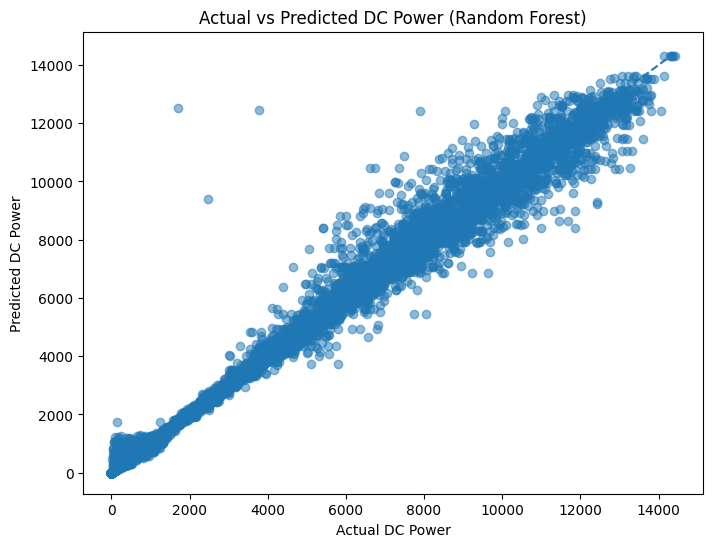

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual DC Power")
plt.ylabel("Predicted DC Power")
plt.title("Actual vs Predicted DC Power (Random Forest)")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")

plt.show()


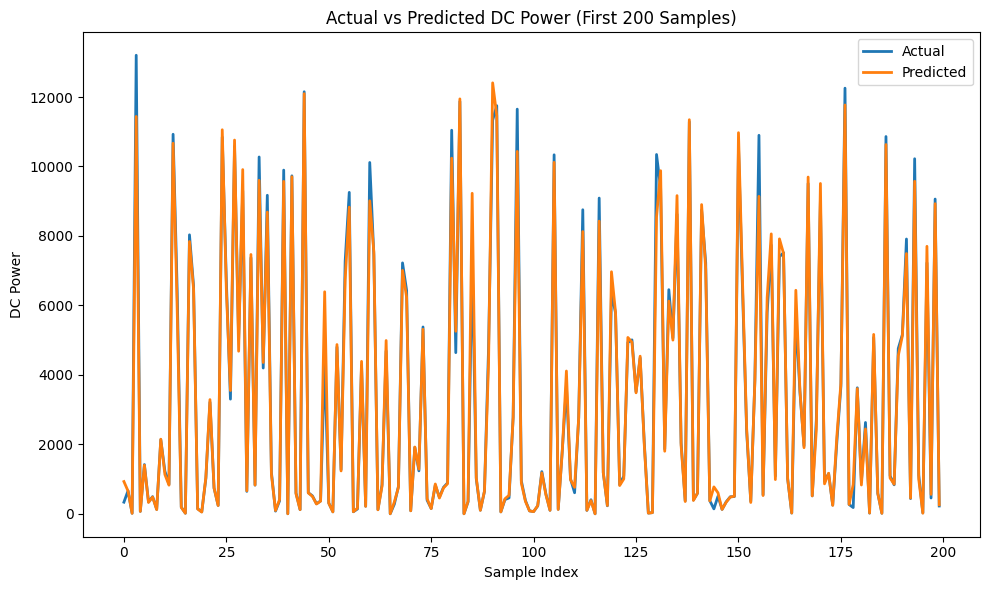

In [17]:
plt.figure(figsize=(10,6))

plt.plot(y_test.values[:200], label="Actual", linewidth=2)
plt.plot(y_pred[:200], label="Predicted", linewidth=2)
plt.title("Actual vs Predicted DC Power (First 200 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("DC Power")
plt.legend()
plt.tight_layout()
plt.show()
